<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>SerieHub Movie Recommendation System 🎬</b></h1>
</div>

<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [68]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

In [69]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [70]:
netflix_data = pd.read_csv("TMDB_movie_dataset_v11.csv")
netflix_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>DATA PRE-PROCESSING AND EDA</b></h2>
</div>

In [71]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058675 entries, 0 to 1058674
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1058675 non-null  int64  
 1   title                 1058663 non-null  object 
 2   vote_average          1058675 non-null  float64
 3   vote_count            1058675 non-null  int64  
 4   status                1058675 non-null  object 
 5   release_date          915240 non-null   object 
 6   revenue               1058675 non-null  int64  
 7   runtime               1058675 non-null  int64  
 8   adult                 1058675 non-null  bool   
 9   backdrop_path         290852 non-null   object 
 10  budget                1058675 non-null  int64  
 11  homepage              114186 non-null   object 
 12  imdb_id               585588 non-null   object 
 13  original_language     1058675 non-null  object 
 14  original_title        1058663 non-

In [72]:
netflix_data.isnull().sum()

id                           0
title                       12
vote_average                 0
vote_count                   0
status                       0
release_date            143435
revenue                      0
runtime                      0
adult                        0
backdrop_path           767823
budget                       0
homepage                944489
imdb_id                 473087
original_language            0
original_title              12
overview                198098
popularity                   0
poster_path             310183
tagline                 907680
genres                  404286
production_companies    566046
production_countries    446760
spoken_languages        431855
keywords                760444
dtype: int64

In [73]:
netflix_data.fillna('', inplace=True)

In [74]:
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1058675.0,NaN,NaN,NaN,695617.751334,372358.604535,2.0,387633.5,697423.0,1022195.5,1311309.0
title,1058675,910266,Home,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vote_average,1058675.0,NaN,NaN,NaN,2.002076,3.072888,0.0,0.0,0.0,5.0,10.0
vote_count,1058675.0,NaN,NaN,NaN,20.258142,329.98762,0.0,0.0,0.0,1.0,34495.0
status,1058675,6,Released,1038273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_date,1058675,42455,,143435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1058675.0,NaN,NaN,NaN,715727.965945,17998554.313668,-12.0,0.0,0.0,0.0,3000000000.0
runtime,1058675.0,NaN,NaN,NaN,49.443295,62.059077,-28.0,0.0,27.0,90.0,14400.0
adult,1058675,2,False,960052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
backdrop_path,1058675,288428,,767823,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
print(netflix_data.columns)

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')


import pandas as pd
from datetime import datetime

# Display the first few rows to confirm the structure
print(netflix_data.head())

# Filter the DataFrame to include only rows where 'status' is 'Released'
released_data = netflix_data[netflix_data['status'] == 'Released']

# Convert the 'release_date' column to datetime, setting errors='coerce' to handle invalid formats
released_data['release_date'] = pd.to_datetime(released_data['release_date'], errors='coerce')

# Drop rows where 'release_date' could not be converted to a valid datetime
released_data = released_data.dropna(subset=['release_date'])

# Get the current date
current_date = datetime.now()

# Filter out rows with release dates beyond the current year and month
released_data = released_data[released_data['release_date'] <= current_date]

# Sort the DataFrame by 'release_date' in descending order (most recent first)
sorted_released_data = released_data.sort_values(by='release_date', ascending=False)

# Display the number of rows after filtering
num_rows = len(sorted_released_data)


print(f"Number of rows after filtering: {num_rows}")

# Create a new DataFrame with only the first 100,000 rows
first_100k_rows = sorted_released_data.head(10000)

# Display the new DataFrame's shape to confirm the size
print(f"Shape of the new DataFrame: {first_100k_rows.shape}")

# Optionally, display the first few rows of the new DataFrame
print(first_100k_rows[['title', 'release_date']].head())


print(first_100k_rows)

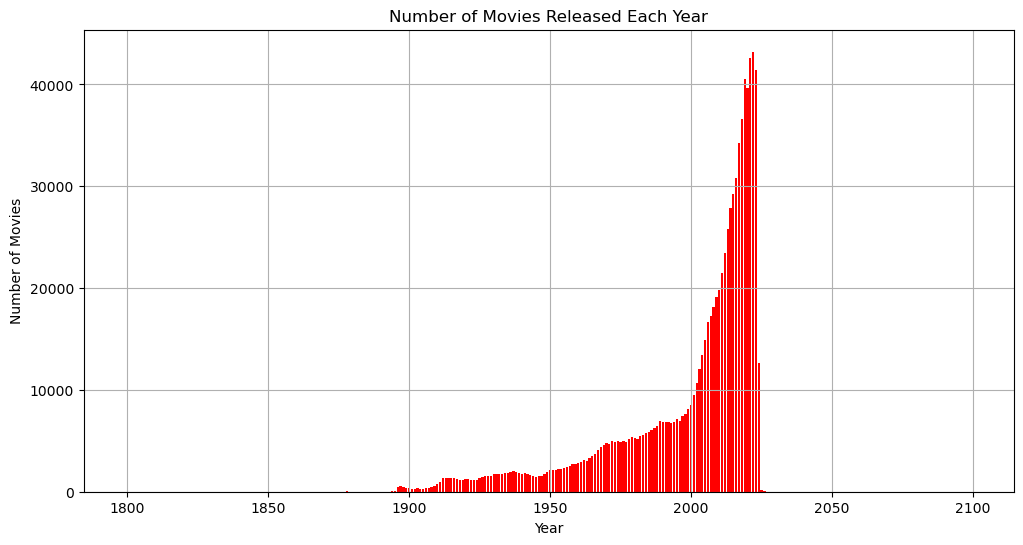

In [10]:
import matplotlib.pyplot as plt

# Assuming the column with release year information is 'release_date' or 'release_year'
# Let's extract the year from 'release_date' if it's in a date format

# If the dataset has a 'release_date' column as a full date, convert it to extract the year
if 'release_date' in netflix_data.columns:
    netflix_data['release_year'] = pd.to_datetime(netflix_data['release_date'], errors='coerce').dt.year
elif 'release_year' in netflix_data.columns:
    netflix_data['release_year'] = netflix_data['release_year']
else:
    print("No suitable column found for release year.")
    netflix_data['release_year'] = None

# Drop rows with missing release year
netflix_data = netflix_data.dropna(subset=['release_year'])

# Count the number of movies released each year
movie_counts = netflix_data['release_year'].value_counts().sort_index()

# Create the bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.bar(movie_counts.index, movie_counts.values, color='red')

# Customize the plot
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)  # Enable grid for better readability

# Display the plot
plt.show()

In [11]:
top_production = netflix_data['production_companies'].value_counts().head(10)

fig = px.treemap(names=top_production.index, parents=["" for _ in top_production.index], values=top_production.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Production companies with Highest Number of Movies',
)
fig.show()

In [12]:
ratings       = list(netflix_data['runtime'].value_counts().index)
rating_counts = list(netflix_data['runtime'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Duration',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

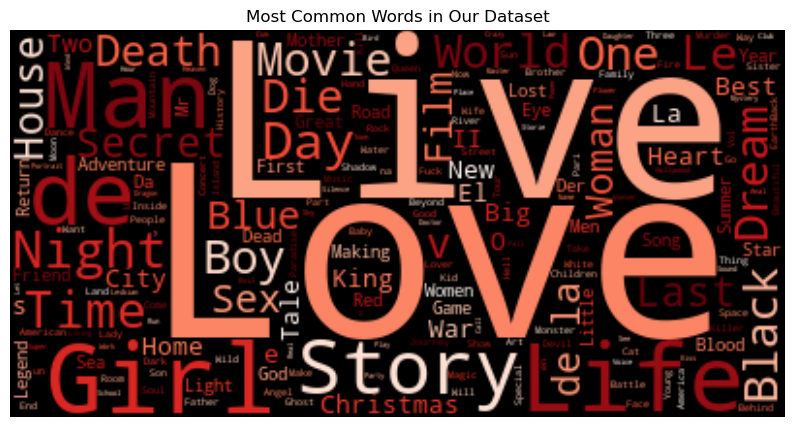

In [13]:
titles = netflix_data['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Our Dataset', color='black')
plt.show()

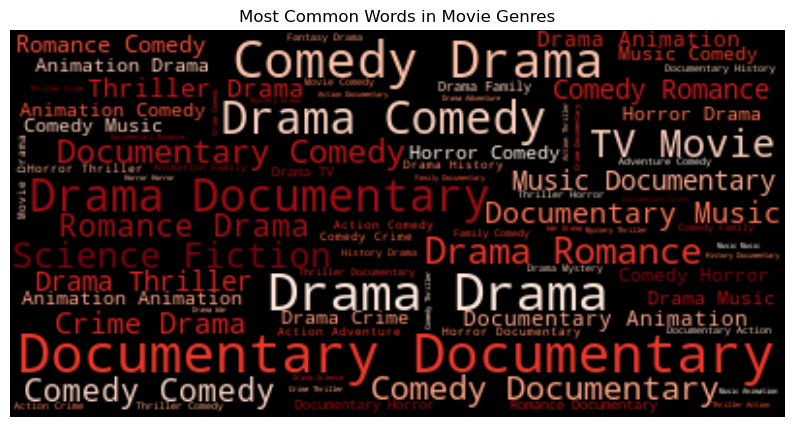

In [16]:
titles = netflix_data['genres'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Genres', color='Black')
plt.show()

In [76]:
netflix_data

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058670,709109,The Hat,0.000,0,Released,,0,0,False,,...,The Hat,,0.600,/dSVh44e67IEJcXuUsO0YQdFrY3I.jpg,,,,,,
1058671,709110,Nevíme dne...,0.000,0,Released,1946-01-01,0,0,False,,...,Nevíme dne...,,0.600,,,Documentary,Krátký film Praha,Czechoslovakia,Czech,traffic safety
1058672,709111,A Purpose,0.000,0,Released,,0,3,False,,...,A Purpose,"Father? - Yes, son! Father Murphy are the crow...",0.600,,,,,,,
1058673,709112,Motorcycle Drive By,0.000,0,Released,2020-05-29,0,22,False,/AudxYGClfExDm8EiUxY6tHXO1Qi.jpg,...,Motorcycle Drive By,“Motorcycle Drive By” is a Third Eye Blind dee...,0.600,/vvJ3dmcmoZ6NTrVeTDbzHPAK6vn.jpg,A Film About Third Eye Blind,,,United States of America,English,


<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>FEATURE ENGINEERING</b></h2>
</div>

In [111]:
new_data = netflix_data[['title', 'genres','overview']]
movie2idx=pd.Series(new_data.index,index=new_data['title'])

In [112]:
new_data.head()

,title,genres,overview
0,Inception,"Action, Science Fiction, Adventure","Cobb, a skilled thief who commits corporate es..."
1,Interstellar,"Adventure, Drama, Science Fiction",The adventures of a group of explorers who mak...
2,The Dark Knight,"Drama, Action, Crime, Thriller",Batman raises the stakes in his war on crime. ...
3,Avatar,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di..."
4,The Avengers,"Science Fiction, Action, Adventure",When an unexpected enemy emerges and threatens...


In [ ]:
movie2idx.head()

In [79]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [80]:
cleaner = TextCleaner()

In [81]:
new_data['genres'] = new_data['genres'].apply(cleaner.remove_space)

new_data['overview'] = new_data['overview'].apply(cleaner.remove_punc)

In [82]:
new_data.head()

,genres,overview
title,,
Inception,"action,sciencefiction,adventure",cobb a skilled thief who commits corporate esp...
Interstellar,"adventure,drama,sciencefiction",the adventures of a group of explorers who mak...
The Dark Knight,"drama,action,crime,thriller",batman raises the stakes in his war on crime w...
Avatar,"action,adventure,fantasy,sciencefiction",in the 22nd century a paraplegic marine is dis...
The Avengers,"sciencefiction,action,adventure",when an unexpected enemy emerges and threatens...


In [83]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [84]:
new_data

,BoW
title,
Inception,"action,sciencefiction,adventure cobb a skilled..."
Interstellar,"adventure,drama,sciencefiction the adventures ..."
The Dark Knight,"drama,action,crime,thriller batman raises the ..."
Avatar,"action,adventure,fantasy,sciencefiction in the..."
The Avengers,"sciencefiction,action,adventure when an unexpe..."
...,...
The Hat,
Nevíme dne...,documentary
A Purpose,father yes son father murphy are the crown pr...


In [95]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [96]:
np.save('tfidf_matrix.npy', tfid_matrix)

In [97]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid_matrix , f)

In [98]:
final_data = netflix_data[['title', 'genres']]

In [99]:
final_data

,title,genres
0,Inception,"Action, Science Fiction, Adventure"
1,Interstellar,"Adventure, Drama, Science Fiction"
2,The Dark Knight,"Drama, Action, Crime, Thriller"
3,Avatar,"Action, Adventure, Fantasy, Science Fiction"
4,The Avengers,"Science Fiction, Action, Adventure"
...,...,...
1058670,The Hat,
1058671,Nevíme dne...,Documentary
1058672,A Purpose,
1058673,Motorcycle Drive By,


In [100]:
final_data.to_csv('movie_data.csv',index=False)

In [101]:
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

loaded_vectorizer

<1058675x539485 sparse matrix of type '<class 'numpy.float64'>'
	with 31419063 stored elements in Compressed Sparse Row format>

<div style="background-color:#E50914; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#000000;"><b>_ Movie Recommendation System 🎬 (FLIX-HUB) _</b></h2>
</div>

In [106]:
def find_index(name):
    return movie2idx[name]

In [108]:
def get_recommendations(model,movie):
    idX=find_index(movie)
    if type(idX) == pd.Series:
        idX=idX.iloc[0]
    result= (-(cosine_similarity(model[idX],model).flatten())).argsort()[1:6]
    print(netflix_data['title'].iloc[result])

In [110]:
get_recommendations(loaded_vectorizer,'Inception')

KeyError: 'Inception'

In [67]:
flix_hub = FlixHub(final_data, data)
movies, tv_shows = flix_hub.recommendation('Can’t Wait To See You', total_result=2, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

ValueError: not enough values to unpack (expected 2, got 0)